# **Analisis de Ventas de Pizzas con Python**

## **1. Introducción**

Este analisis busca explorar las tendencias de ventas de pizzas en función de diversos factores como `tipo de pizza`, `categoria`, `tamaño` y `fecha de compra`. Se analizaran patrones de compra, los `ingredientes` mas usados y el comportamiento de los clientes a lo largo del `tiempo`.


## **2. Carga y Preparación de Datos**

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Cargar dataset desde archivo CSV
df = pd.read_csv("./datos/ventas_pizzas.csv")  

# Ver primeras filas
df.head()

,id_pizza,id_pedido,id_nom_pizza,cantidad,fecha_pedido,hora_pedido,precio_unit,precio_total,tam_pizza,cat_pizza,ingred_pizza,nom_pizza
0,1,1,hawaiana_m,1,01/01/2024,11:38:36,13.25,13.25,M,Clasica,"Jamon en Lonjas, Pina, Queso Mozzarella",Pizza Hawaiana
1,2,2,clasica_dlx_m,1,01/01/2024,11:57:40,16.00,16.00,M,Clasica,"Pepperoni, Champinon, Cebolla Roja, Pimiento R...",La Clasica Deluxe
2,3,2,cinco_quesos_g,1,01/01/2024,11:57:40,18.50,18.50,G,Vegetariana,"Queso Mozzarella, Queso Provolone, Queso Gouda...",Pizza Cinco Quesos
3,4,2,supr_italiana_g,1,01/01/2024,11:57:40,20.75,20.75,G,Suprema,"Salami Calabres, Capocollo, Tomate, Cebolla Ro...",Pizza Suprema Italiana
4,5,2,mexicana_m,1,01/01/2024,11:57:40,16.00,16.00,M,Vegetariana,"Tomate, Pimiento Rojo, Chile Jalapeno, Cebolla...",Pizza Mexicana


In [3]:
# Ver informacion general del dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_pizza      48620 non-null  int64  
 1   id_pedido     48620 non-null  int64  
 2   id_nom_pizza  48620 non-null  object 
 3   cantidad      48620 non-null  int64  
 4   fecha_pedido  48620 non-null  object 
 5   hora_pedido   48620 non-null  object 
 6   precio_unit   48620 non-null  float64
 7   precio_total  48620 non-null  float64
 8   tam_pizza     48620 non-null  object 
 9   cat_pizza     48620 non-null  object 
 10  ingred_pizza  48620 non-null  object 
 11  nom_pizza     48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [4]:
# Convertir columnas de fecha y hora a formato adecuado
df["fecha_pedido"] = pd.to_datetime(df["fecha_pedido"], format="%d/%m/%Y")
df["hora_pedido"] = pd.to_datetime(df["hora_pedido"], format="%H:%M:%S").dt.time

# Verificar cambios
df.dtypes

id_pizza                 int64
id_pedido                int64
id_nom_pizza            object
cantidad                 int64
fecha_pedido    datetime64[ns]
hora_pedido             object
precio_unit            float64
precio_total           float64
tam_pizza               object
cat_pizza               object
ingred_pizza            object
nom_pizza               object
dtype: object

In [5]:
# Verificar valores nulos
df.isnull().sum()

id_pizza        0
id_pedido       0
id_nom_pizza    0
cantidad        0
fecha_pedido    0
hora_pedido     0
precio_unit     0
precio_total    0
tam_pizza       0
cat_pizza       0
ingred_pizza    0
nom_pizza       0
dtype: int64

## **3. Analisis Exploratorio de Datos (EDA)**

### Resumen General del Dataset

In [6]:
# Mostrar el numero de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Resumen estadistico de los datos numericos
df.describe()

El dataset tiene 48620 filas y 12 columnas.


,id_pizza,id_pedido,cantidad,fecha_pedido,precio_unit,precio_total
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.519251,10701.515487,1.019622,2024-06-29 07:05:21.941587712,16.494132,16.821474
min,1.000000,1.000000,1.000000,2024-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2024-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2024-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2024-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2024-12-31 00:00:00,35.950000,83.000000
std,14035.524102,6180.173637,0.143077,NaN,3.621789,4.437398


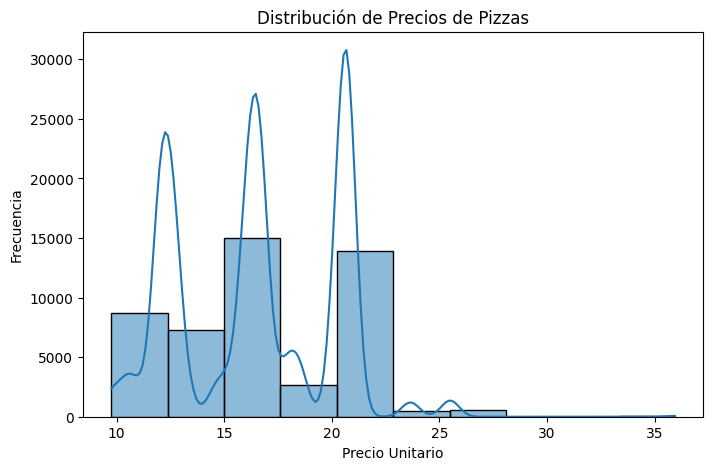

In [7]:
# Histograma de precios unitarios
plt.figure(figsize=(8,5))
sns.histplot(df["precio_unit"], bins=10, kde=True)
plt.title("Distribución de Precios de Pizzas")
plt.xlabel("Precio Unitario")
plt.ylabel("Frecuencia")
plt.show()

### Analisis de Valores Únicos y Distribución


In [8]:
# Ver valores unicos en cada columna categorica
for col in ["cat_pizza", "tam_pizza", "nom_pizza"]:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique())



Valores únicos en cat_pizza:
['Clasica' 'Vegetariana' 'Suprema' 'Pollo']

Valores únicos en tam_pizza:
['M' 'G' 'P' 'EXG' 'DOEXG']

Valores únicos en nom_pizza:
['Pizza Hawaiana' 'La Clasica Deluxe' 'Pizza Cinco Quesos'
 'Pizza Suprema Italiana' 'Pizza Mexicana' 'Pizza Pollo Thai'
 'Pizza Prosciutto y Rucula' 'Pizza Pollo BBQ' 'Pizza Griega'
 'Pizza Suprema de Espinaca' 'Pizza Jardin Verde'
 'Pizza Capocollo Italiano' 'Pizza Italiana Picante'
 'Pizza Espinaca con Pesto' 'Pizza Vegetales' 'Pizza Pollo del Suroeste'
 'Pizza Pollo California' 'Pizza Pepperoni' 'Pizza Pollo con Pesto'
 'Pizza Gran Carne' 'Pizza Soppressata' 'Pizza Cuatro Quesos'
 'Pizza Napolitana' 'Pizza Calabresa' 'Pizza Verduras Italianas'
 'Pizza Mediterranea' 'Pizza Salami Picante' 'Pizza Espinaca y Feta'
 'Pizza Siciliana' 'Pizza Pollo Alfredo'
 'Pizza Pepperoni, Champinones y Pimientos' 'Pizza Brie Carre']


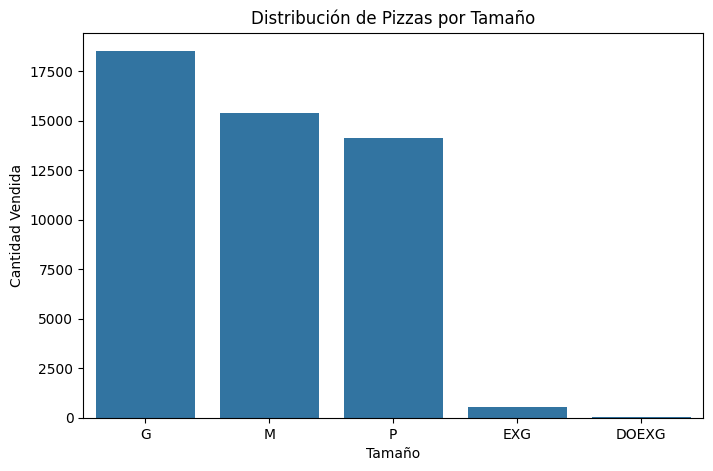

In [9]:
# Conteo de tamaños de pizza vendidos
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="tam_pizza", order=df["tam_pizza"].value_counts().index)
plt.title("Distribución de Pizzas por Tamaño")
plt.xlabel("Tamaño")
plt.ylabel("Cantidad Vendida")
plt.show()

### Distribucion de Precios Totales y Unitarios

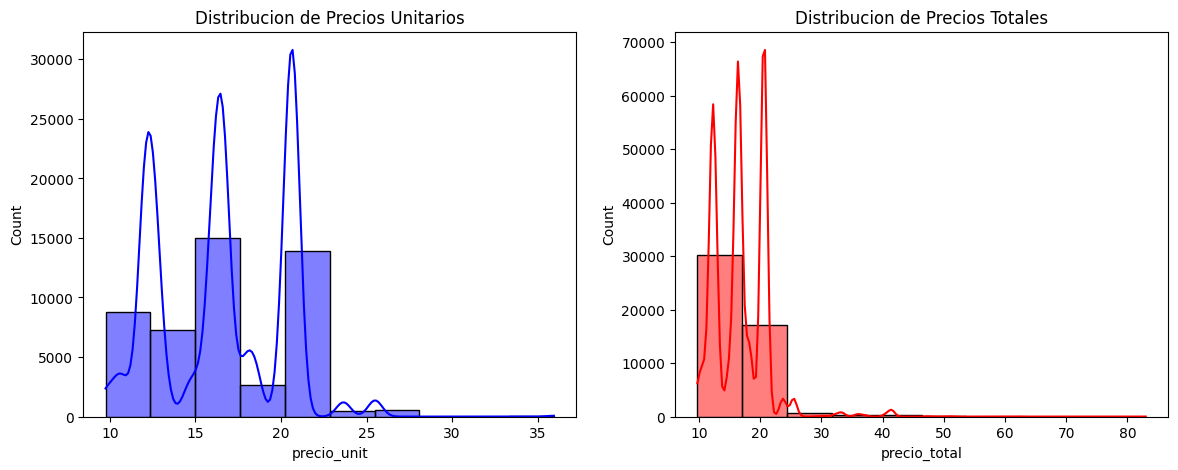

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(df["precio_unit"], bins=10, kde=True, ax=ax[0], color="blue")
ax[0].set_title("Distribucion de Precios Unitarios")

sns.histplot(df["precio_total"], bins=10, kde=True, ax=ax[1], color="red")
ax[1].set_title("Distribucion de Precios Totales")

plt.show()


### Distribucion de Variables Categoricas

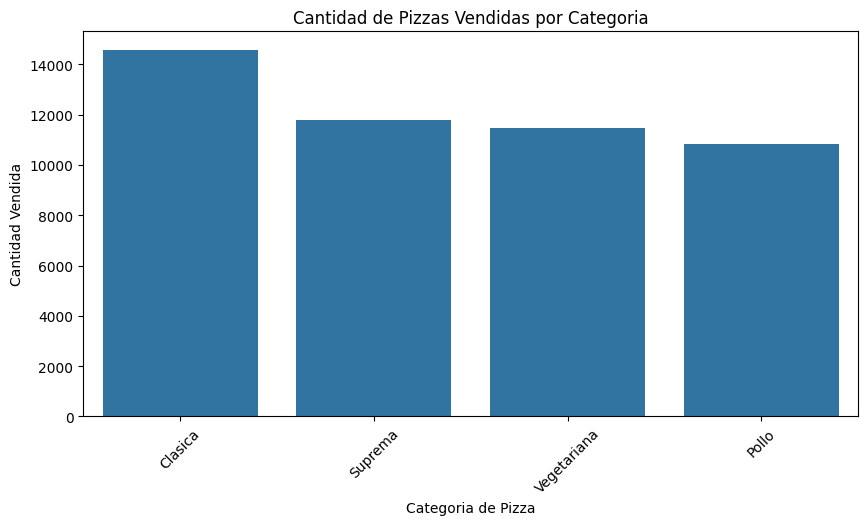

In [11]:
# Conteo de categorias de pizza
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="cat_pizza", order=df["cat_pizza"].value_counts().index)
plt.title("Cantidad de Pizzas Vendidas por Categoria")
plt.xlabel("Categoria de Pizza")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()


## **4. Analisis de Ventas**

# Evolucion de Ventas por Dia

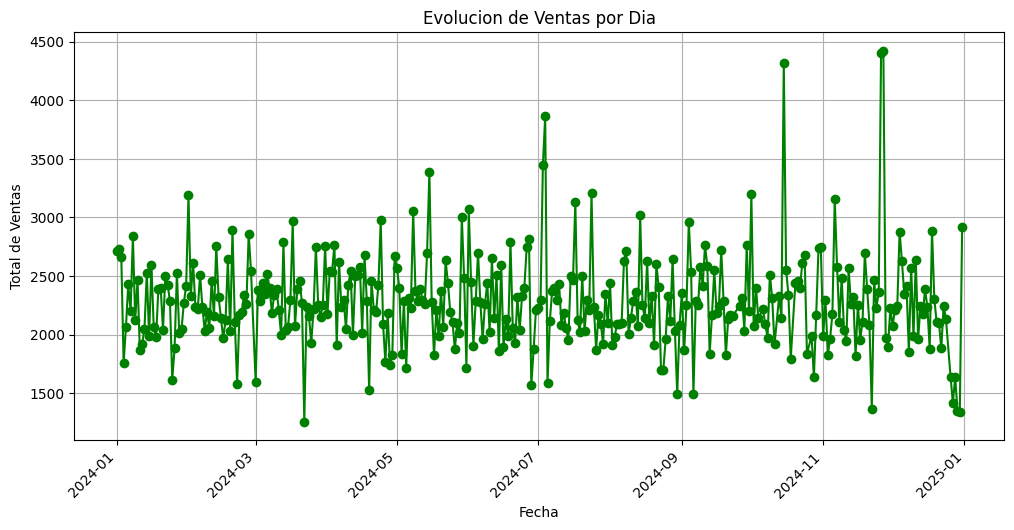

In [12]:
ventas_diarias = df.groupby("fecha_pedido")["precio_total"].sum()

plt.figure(figsize=(12,6))
ventas_diarias.plot(marker="o", linestyle="-", color="green")
plt.title("Evolucion de Ventas por Dia")
plt.xlabel("Fecha")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=45)
plt.grid()
plt.show()


### Top 5 Pizzas Mas Vendidas

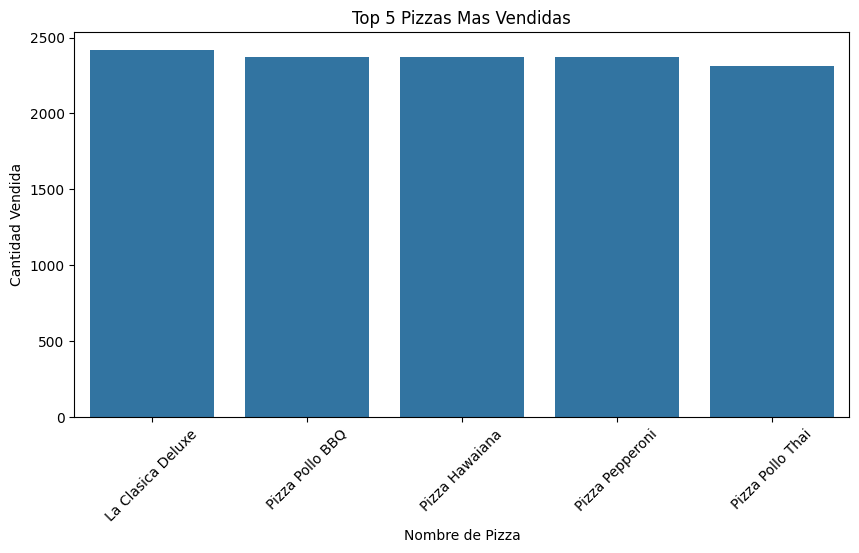

In [13]:
top_pizzas = df["nom_pizza"].value_counts().head(5)

plt.figure(figsize=(10,5))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values)
plt.title("Top 5 Pizzas Mas Vendidas")
plt.xlabel("Nombre de Pizza")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()


### Analisis de Categoria de Pizza Mas Vendida

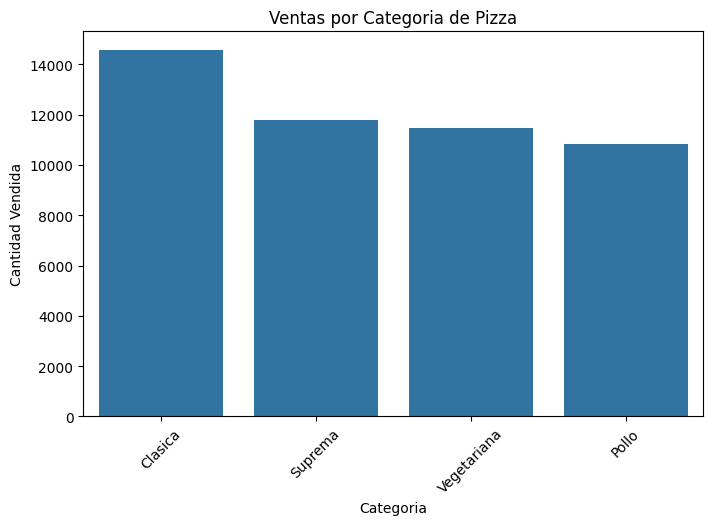

In [14]:
categoria_popular = df["cat_pizza"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=categoria_popular.index, y=categoria_popular.values)
plt.title("Ventas por Categoria de Pizza")
plt.xlabel("Categoria")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()


### Precio Promedio por Categoria de Pizza

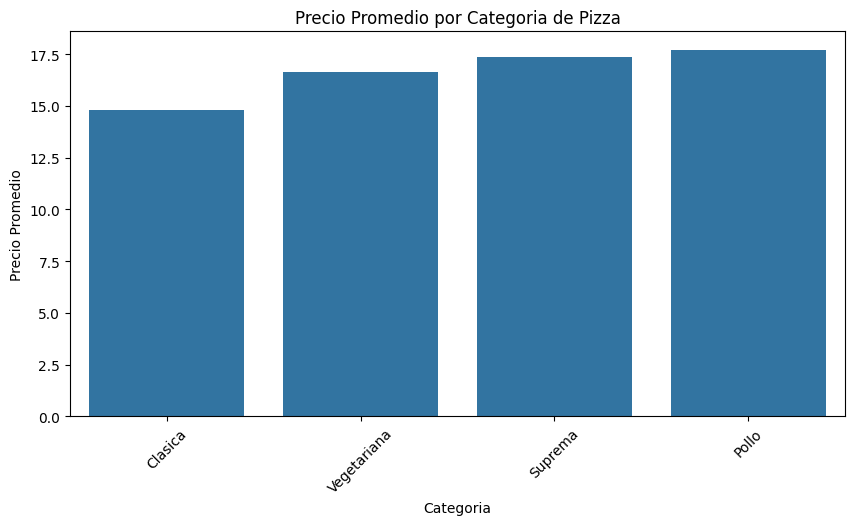

In [15]:
precio_promedio_categoria = df.groupby("cat_pizza")["precio_unit"].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=precio_promedio_categoria.index, y=precio_promedio_categoria.values)
plt.title("Precio Promedio por Categoria de Pizza")
plt.xlabel("Categoria")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=45)
plt.show()


## **5. Analisis de Patrones de Compra**

### Distribucion de Pedidos por Hora del Dia

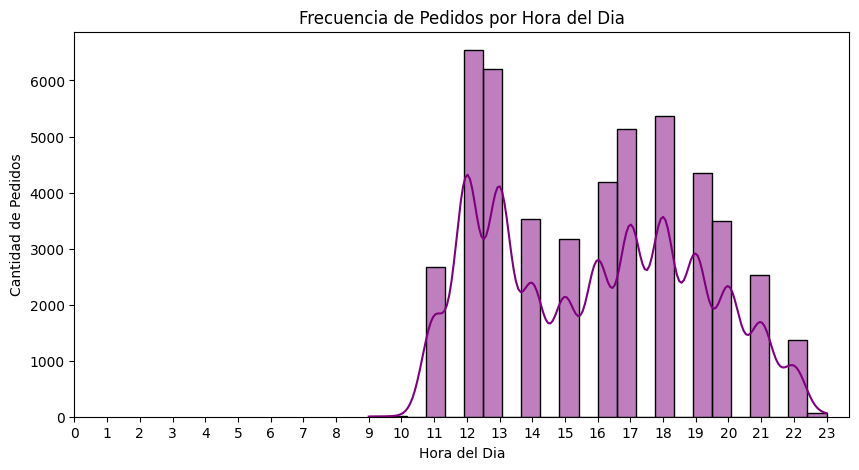

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df["hora_pedido"].apply(lambda x: x.hour), bins=24, kde=True, color="purple")
plt.title("Frecuencia de Pedidos por Hora del Dia")
plt.xlabel("Hora del Dia")
plt.ylabel("Cantidad de Pedidos")
plt.xticks(range(0,24))
plt.show()


### Días con Mas Pedidos

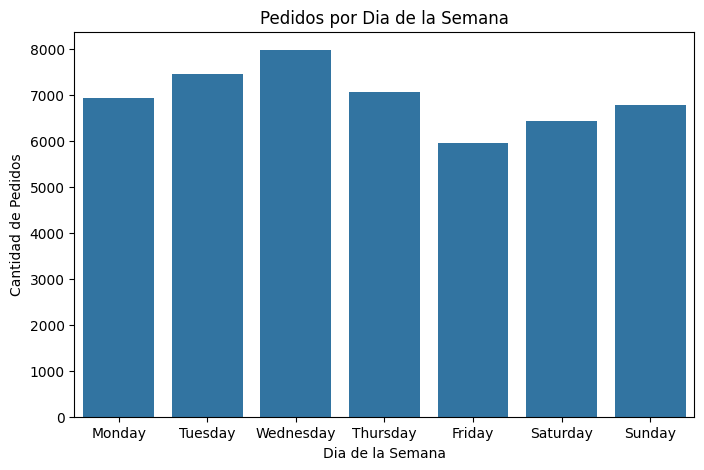

In [17]:
df["dia_semana"] = df["fecha_pedido"].dt.day_name()

dias_pedidos = df["dia_semana"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=dias_pedidos.index, y=dias_pedidos.values, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Pedidos por Dia de la Semana")
plt.xlabel("Dia de la Semana")
plt.ylabel("Cantidad de Pedidos")
plt.show()


### Promedio de Pizzas por Pedido

In [18]:
promedio_pizzas_pedido = df.groupby("id_pedido")["cantidad"].sum().mean()
print(f"El promedio de pizzas por pedido es: {promedio_pizzas_pedido:.2f}")


El promedio de pizzas por pedido es: 2.32


### Analisis de Pizzas Compradas Juntas

In [19]:
from itertools import combinations
from collections import Counter

# Obtener combinaciones de pizzas por pedido
pedidos = df.groupby("id_pedido")["nom_pizza"].apply(list)

# Contar las combinaciones mas comunes
combinaciones = Counter()
for pedido in pedidos:
    for comb in combinations(sorted(pedido), 2):
        combinaciones[comb] += 1

# Mostrar las 5 combinaciones mas comunes
combinaciones.most_common(5)


[(('Pizza Hawaiana', 'Pizza Pollo Thai'), 319),
 (('Pizza Pepperoni', 'Pizza Pollo BBQ'), 309),
 (('Pizza Pepperoni', 'Pizza Pollo Thai'), 299),
 (('Pizza Hawaiana', 'Pizza Pepperoni'), 299),
 (('La Clasica Deluxe', 'Pizza Hawaiana'), 296)]

## **6. Visualizacion de Datos**

### Nube de Palabras de Ingredientes Mas Usados

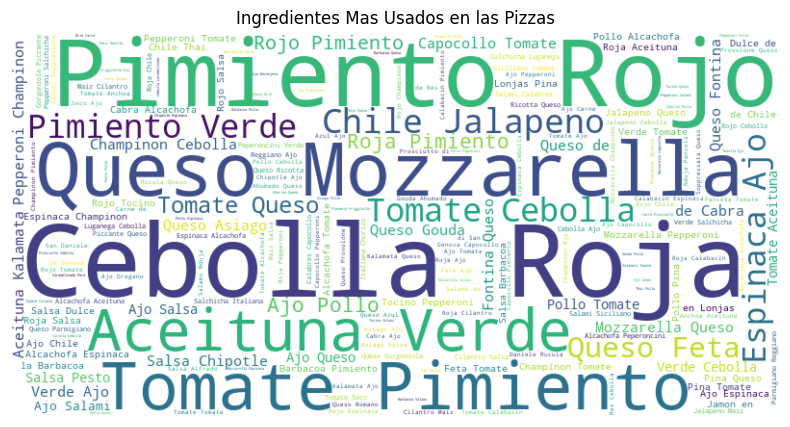

In [20]:
ingredientes_text = " ".join(df["ingred_pizza"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(ingredientes_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ingredientes Mas Usados en las Pizzas")
plt.show()


### Relacion Precio vs Cantidad Vendida

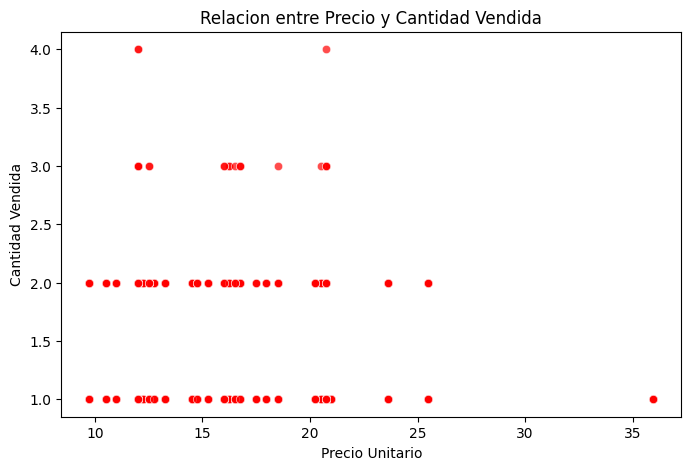

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="precio_unit", y="cantidad", alpha=0.7, color="red")
plt.title("Relacion entre Precio y Cantidad Vendida")
plt.xlabel("Precio Unitario")
plt.ylabel("Cantidad Vendida")
plt.show()


### Boxplot de Precios por Tamaño de Pizza

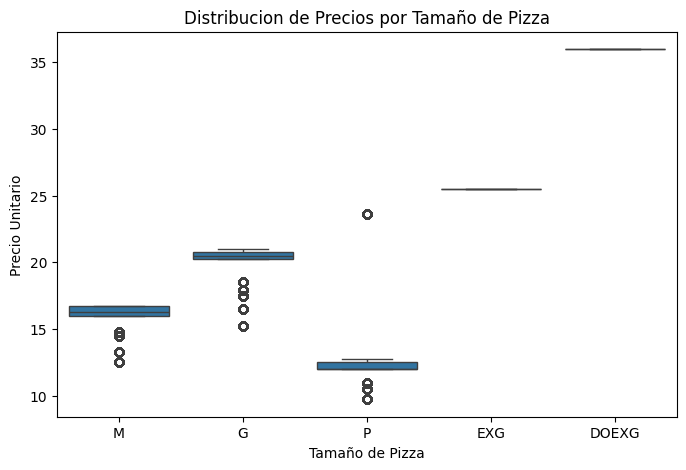

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="tam_pizza", y="precio_unit")
plt.title("Distribucion de Precios por Tamaño de Pizza")
plt.xlabel("Tamaño de Pizza")
plt.ylabel("Precio Unitario")
plt.show()


### Heatmap de Correlacion entre Variables Numericas

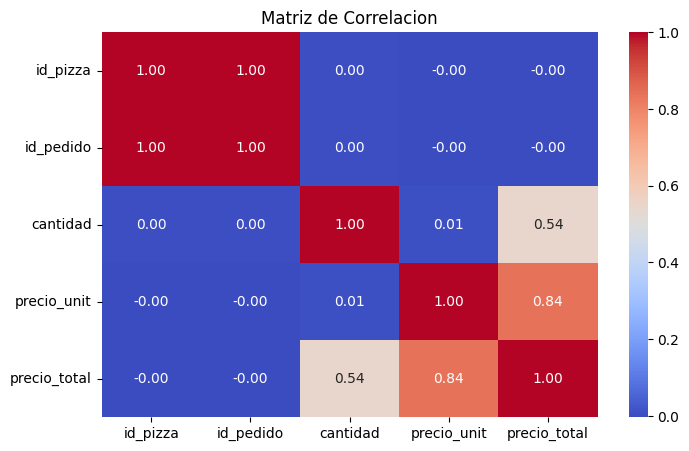

In [23]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlacion")
plt.show()


## **7. Conclusiones y Hallazgos**

1. Dias y meses mas ocupados  
- Los pedidos son mas altos los **martes y miercoles por la noche**.  
- A nivel mensual, el mes con mas pedidos es **julio**, lo que sugiere un posible aumento en demanda por vacaciones o promociones.  

2. Rendimiento de ventas  
- La categoria **Clasica** es la que mas contribuye tanto en numero de pedidos como en ingresos totales.  
- Las pizzas de **tamaño grande (G)** generan la mayor cantidad de ingresos, lo que sugiere que los clientes prefieren opciones mas grandes o que estas son mas rentables.  

3. Pizzas mas vendidas  
- **Ingresos:** La pizza **Pollo Thai** genera la mayor cantidad de ventas.  
- **Cantidad vendida:** La pizza **Clasica Deluxe** es la mas popular entre los clientes.  
- **Pedidos totales:** La pizza **Clasica Deluxe** tambien lidera en el total de pedidos, confirmando su popularidad en general.  

4. Pizzas menos vendidas  
- **Ingresos y cantidad vendida:** La pizza **Brie Carre** es la menos popular.  
- **Pedidos totales:** La **Brie Carre** tambien tiene el menor numero de pedidos, lo que indica que podría necesitar una estrategia de promoción o reconsideración en el menu.  

5. Horas mas ocupadas  
- **Hora pico del almuerzo:** 12:00 p.m. - 1:30 p.m.  
- **Hora pico de la cena:** 6:00 p.m. - 8:00 p.m.  
- Estos datos indican que los clientes suelen pedir pizza durante las comidas principales, lo que sugiere oportunidades para promociones en estos horarios.  